In [11]:
import pandas as pd
import psycopg2
from datetime import datetime as dt
import seaborn as sns

In [4]:
def log_on():
    dsn = "dbname='postgres' user='stockland' host='localhost' password='Stock_202!'"
    pyConn = psycopg2.connect(dsn)
    return pyConn

In [35]:
sql = 'select * from dev_amit.lga_crime_avg_with_poi'
pyConn = log_on()
cur = pyConn.cursor()
cur.execute(sql)

assault = pd.DataFrame(cur.fetchall(),columns = [x[0] for x in cur.description])
pyConn.close()


AttributeError: 'DataFrame' object has no attribute 'avg'

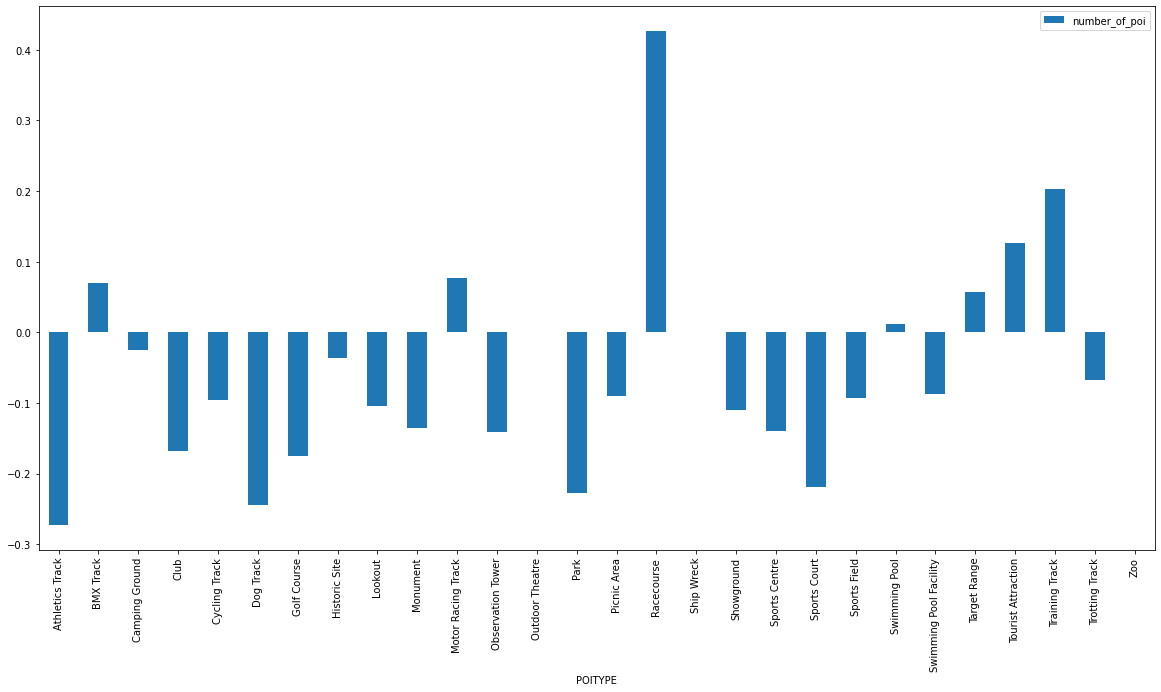

In [45]:
assault.crime_rate = assault.crime_rate.astype('float')
corr=assault.groupby('POITYPE')[['number_of_poi','crime_rate']].corr()
corr = corr.reset_index()[corr.reset_index().level_1 == 'crime_rate'][['POITYPE','number_of_poi']].set_index('POITYPE')
# plot the heatmap
corr.plot.bar(figsize = (20,10))

In [48]:
crime.POITYPE.unique()

array(['Athletics Track', 'BMX Track', 'Camping Ground', 'Club',
       'Cycling Track', 'Dog Track', 'Golf Course', 'Historic Site',
       'Lookout', 'Monument', 'Motor Racing Track', 'Observation Tower',
       'Outdoor Theatre', 'Park', 'Picnic Area', 'Racecourse',
       'Ship Wreck', 'Showground', 'Sports Centre', 'Sports Court',
       'Sports Field', 'Swimming Pool', 'Swimming Pool Facility',
       'Target Range', 'Tourist Attraction', 'Training Track',
       'Trotting Track', 'Zoo'], dtype=object)

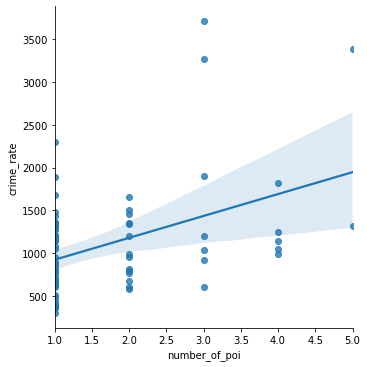

In [55]:
sns.lmplot(x='number_of_poi',y='crime_rate',data=assault[assault.POITYPE == 'Racecourse'],fit_reg=True) 

In [46]:
sql = 'select * from dev_amit.drug_offenses_lga_with_poi'
pyConn = log_on()
cur = pyConn.cursor()
cur.execute(sql)

offense = pd.DataFrame(cur.fetchall(),columns = [x[0] for x in cur.description])
pyConn.close()


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

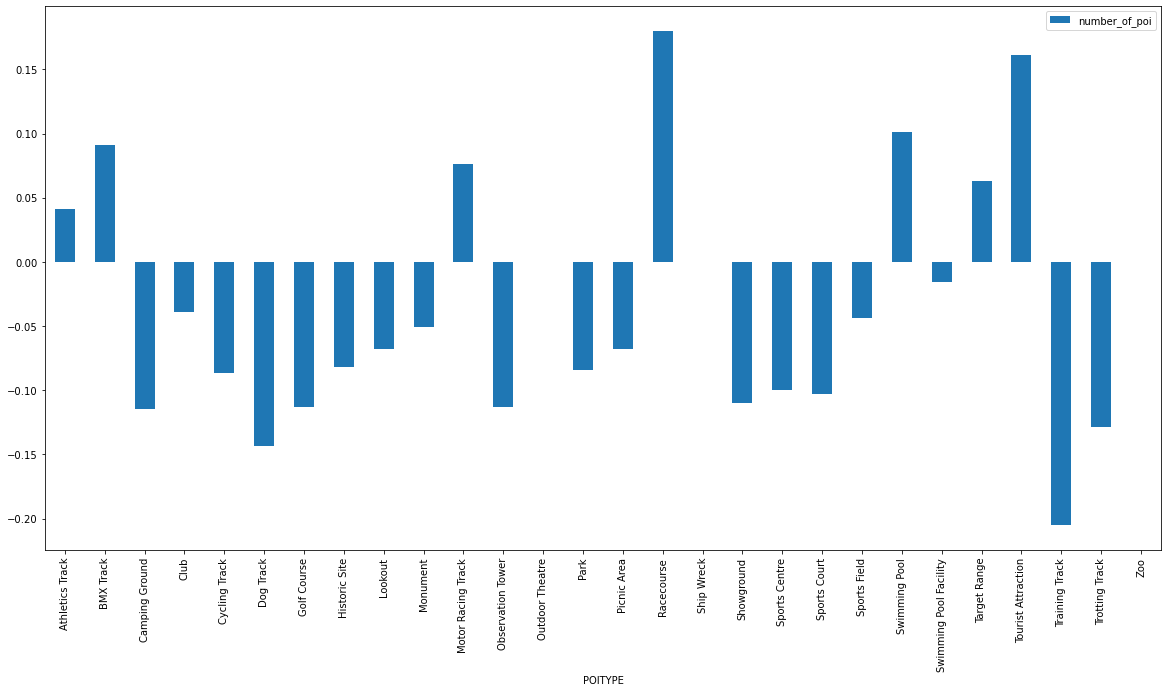

In [47]:
offense.drug_offense_rate = offense.drug_offense_rate.astype('float')
corr=offense.groupby('POITYPE')[['number_of_poi','drug_offense_rate']].corr()
corr = corr.reset_index()[corr.reset_index().level_1 == 'drug_offense_rate'][['POITYPE','number_of_poi']].set_index('POITYPE')
# plot the heatmap
corr.plot.bar(figsize = (20,10))

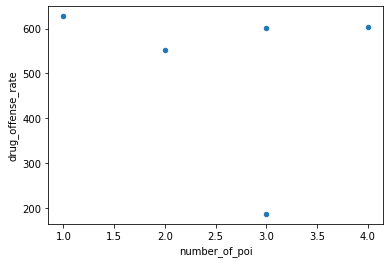

In [53]:
offense[offense.POITYPE == 'Training Track'].plot.scatter(x= 'number_of_poi', y= 'drug_offense_rate')

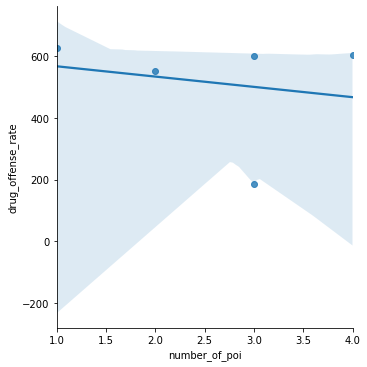

In [54]:
sns.lmplot(x='number_of_poi',y='drug_offense_rate',data=offense[offense.POITYPE == 'Training Track'],fit_reg=True) 

In [56]:
sql = 'select * from dev_amit.lga_homicides_geom_poi'
pyConn = log_on()
cur = pyConn.cursor()
cur.execute(sql)

homicides = pd.DataFrame(cur.fetchall(),columns = [x[0] for x in cur.description])
pyConn.close()

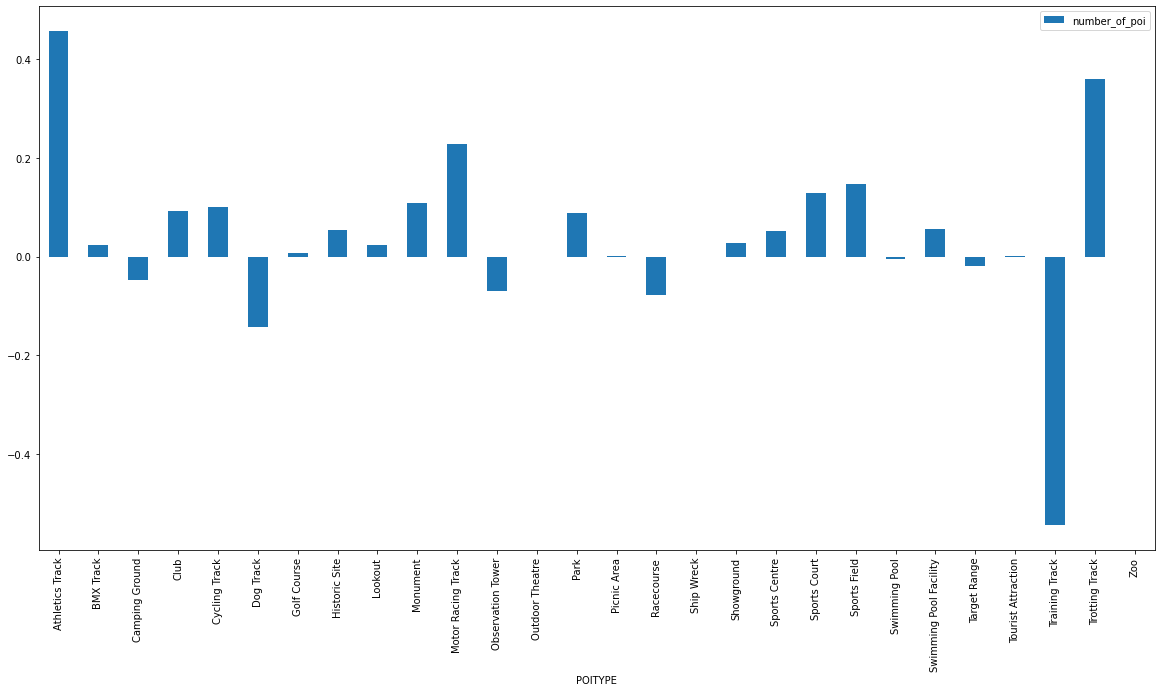

In [58]:
homicides.lga_homicides_rate = homicides.lga_homicides_rate.astype('float')
corr=homicides.groupby('POITYPE')[['number_of_poi','lga_homicides_rate']].corr()
corr = corr.reset_index()[corr.reset_index().level_1 == 'lga_homicides_rate'][['POITYPE','number_of_poi']].set_index('POITYPE')
# plot the heatmap
corr.plot.bar(figsize = (20,10))

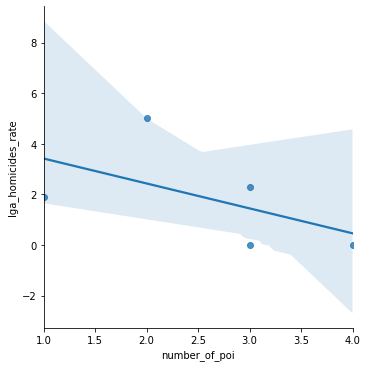

In [60]:
sns.lmplot(x='number_of_poi',y='lga_homicides_rate',data=homicides[homicides.POITYPE == 'Training Track'],fit_reg=True) 